Exploratory Data Analysis Techniques

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/taylor_swift_spotify.csv')

# Display the first few rows of the dataframe
print(df.head())


   Unnamed: 0                                           name  \
0           0         Welcome To New York (Taylor's Version)   
1           1                 Blank Space (Taylor's Version)   
2           2                       Style (Taylor's Version)   
3           3            Out Of The Woods (Taylor's Version)   
4           4  All You Had To Do Was Stay (Taylor's Version)   

                              album release_date  track_number  \
0  1989 (Taylor's Version) [Deluxe]   2023-10-27             1   
1  1989 (Taylor's Version) [Deluxe]   2023-10-27             2   
2  1989 (Taylor's Version) [Deluxe]   2023-10-27             3   
3  1989 (Taylor's Version) [Deluxe]   2023-10-27             4   
4  1989 (Taylor's Version) [Deluxe]   2023-10-27             5   

                       id                                   uri  acousticness  \
0  4WUepByoeqcedHoYhSNHRt  spotify:track:4WUepByoeqcedHoYhSNHRt      0.009420   
1  0108kcWLnn2HlH2kedi1gn  spotify:track:0108kcWLnn2HlH2

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('/content/taylor_swift_spotify.csv')

# 1. Introduction to the Taylor Swift Dataset
print("1. Introduction to the Taylor Swift Dataset")
# Provide background information on the dataset
# Explain the source of the data and its relevance
# Discuss the significance of exploring Taylor Swift's music catalog


1. Introduction to the Taylor Swift Dataset


In [ ]:
# 2. Overview of the Features
print("\n2. Overview of the Features")
# Introduce the features present in the dataset
# Briefly describe each feature and its potential importance in the analysis
# Highlight any interesting aspects of the data
print(df.info())
print(df.head())




2. Overview of the Features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        530 non-null    int64  
 1   name              530 non-null    object 
 2   album             530 non-null    object 
 3   release_date      530 non-null    object 
 4   track_number      530 non-null    int64  
 5   id                530 non-null    object 
 6   uri               530 non-null    object 
 7   acousticness      530 non-null    float64
 8   danceability      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  valence           530 non-null    float64
 16  popularity     

In [ ]:
# 3. Data Cleaning and Preparation
print("\n3. Data Cleaning and Preparation")
# Discuss the importance of data cleaning for accurate analysis
# Perform data cleaning steps such as handling missing values, removing duplicates, and ensuring data consistency
# Convert data types if necessary (e.g., converting release_date to datetime format)
# Example:
df.dropna(inplace=True)  # Dropping rows with missing values
df['release_date'] = pd.to_datetime(df['release_date'])  # Converting release_date to datetime



3. Data Cleaning and Preparation



4. Descriptive Statistics and Visualization
       Unnamed: 0  track_number  acousticness  danceability      energy  \
count  530.000000    530.000000    530.000000    530.000000  530.000000   
mean   264.500000     11.184906      0.319247      0.585285    0.574609   
std    153.142091      7.981060      0.327043      0.113121    0.191565   
min      0.000000      1.000000      0.000184      0.243000    0.118000   
25%    132.250000      5.000000      0.036250      0.516000    0.443000   
50%    264.500000     10.000000      0.165000      0.595500    0.589500   
75%    396.750000     15.000000      0.653000      0.653000    0.729750   
max    529.000000     46.000000      0.971000      0.897000    0.950000   

       instrumentalness    liveness    loudness  speechiness       tempo  \
count        530.000000  530.000000  530.000000   530.000000  530.000000   
mean           0.004005    0.163492   -7.505434     0.055889  122.332311   
std            0.033163    0.142263    2.939040    

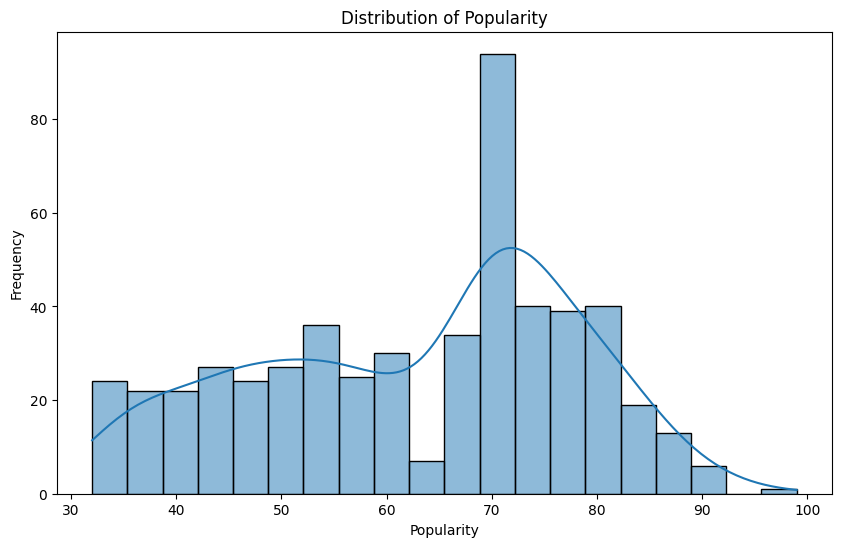

In [ ]:

# 4. Descriptive Statistics and Visualization
print("\n4. Descriptive Statistics and Visualization")
# Compute summary statistics for numerical features
print(df.describe())
# Visualize the distribution of numeric features
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()



5. Exploring Relationships
                  Unnamed: 0  track_number  acousticness  danceability  \
Unnamed: 0          1.000000     -0.042315     -0.097296     -0.077791   
track_number       -0.042315      1.000000      0.005514     -0.034588   
acousticness       -0.097296      0.005514      1.000000     -0.164865   
danceability       -0.077791     -0.034588     -0.164865      1.000000   
energy              0.140708     -0.000274     -0.709822      0.029458   
instrumentalness   -0.091109     -0.033178      0.150512     -0.092990   
liveness            0.167036     -0.051937     -0.135063     -0.143591   
loudness            0.298606     -0.024528     -0.717599      0.003267   
speechiness        -0.080307      0.004819      0.049464      0.192788   
tempo               0.018727      0.051063     -0.080055     -0.219289   
valence             0.097775     -0.010421     -0.194686      0.312468   
popularity         -0.640330     -0.276381      0.076134      0.059702   
duration_m

<ipython-input-6-0d376b4a5f69>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


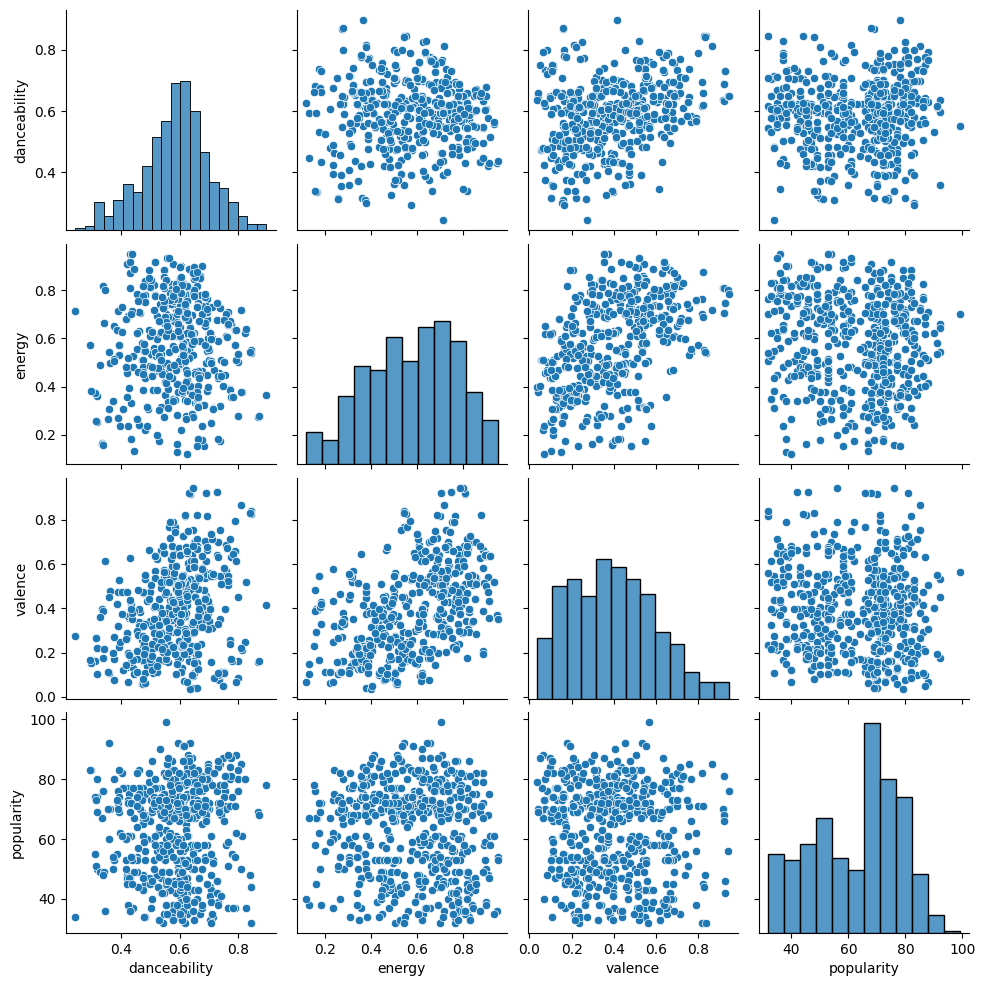

In [ ]:

# 5. Exploring Relationships
print("\n5. Exploring Relationships")
# Analyze correlations between features using correlation matrices
correlation_matrix = df.corr()
print(correlation_matrix)
# Visualize relationships between variables using scatter plots
sns.pairplot(df[['danceability', 'energy', 'valence', 'popularity']])
plt.show()


In [ ]:

# 6. Time Analysis of Taylor Swift's Discography
print("\n6. Time Analysis of Taylor Swift's Discography")
# Analyze the distribution of Taylor Swift's songs over time
# Explore trends in popularity and other features over different albums or years
# Visualize temporal patterns using line plots or time series analysis techniques




6. Time Analysis of Taylor Swift's Discography


Importance of Time Analysis
Where its used
Why its used

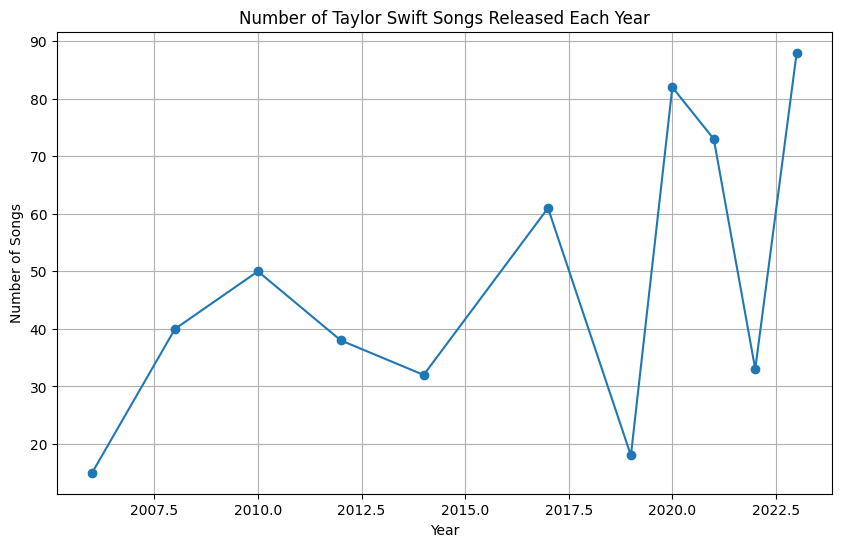

In [ ]:
# Convert release_date to datetime if not already done
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year and month from release_date
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

# Group by year and count the number of songs released each year
songs_per_year = df.groupby('year').size()

# Plot the number of songs released each year
plt.figure(figsize=(10, 6))
songs_per_year.plot(marker='o', linestyle='-')
plt.title('Number of Taylor Swift Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()



7. Text Analysis of Song Names


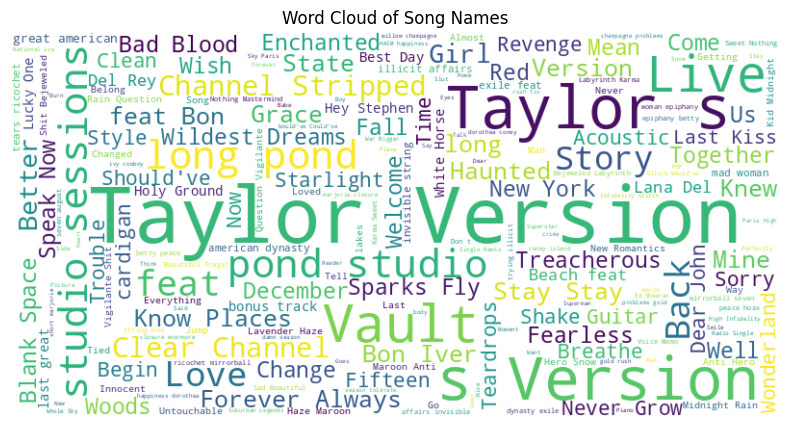

In [ ]:
# 7. Text Analysis of Song Names
print("\n7. Text Analysis of Song Names")
# Perform text analysis on song names
# Analyze word frequency, word cloud visualization, etc., to understand common themes in song titles
text = ' '.join(df['name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Names')
plt.show()




8. Advanced Visualization Techniques


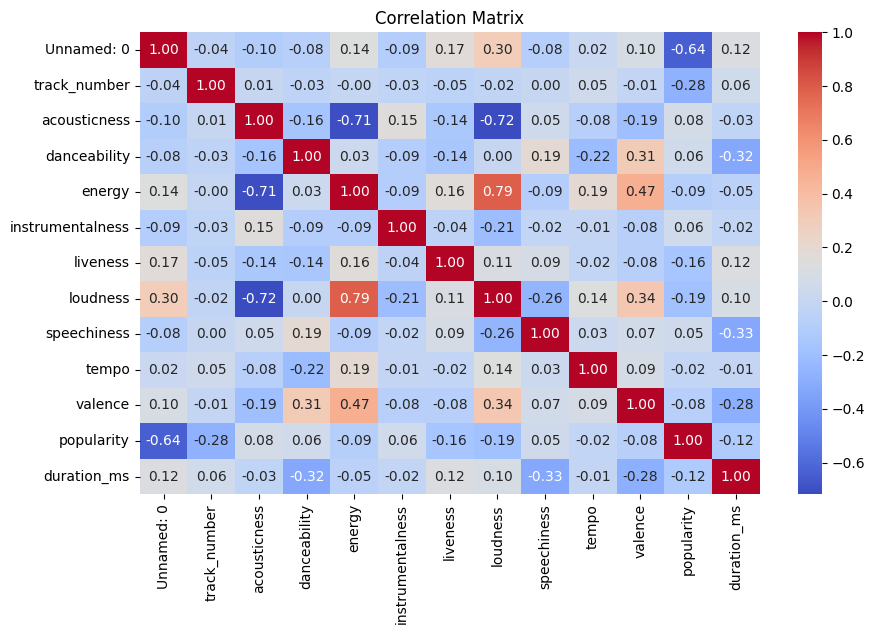

In [ ]:
# 8. Advanced Visualization Techniques
print("\n8. Advanced Visualization Techniques")
# Utilize more advanced visualization techniques such as heatmaps, violin plots, etc.
# Example:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




9. Outlier Detection and Handling


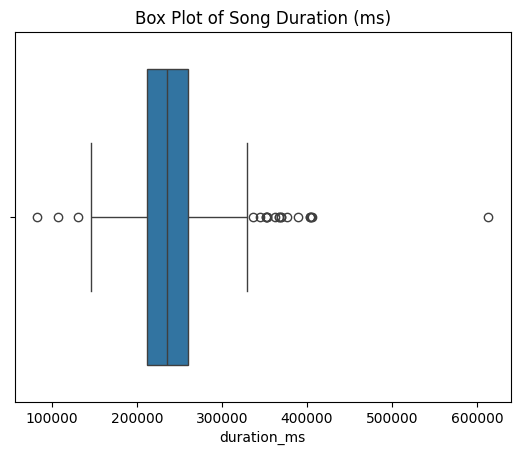

In [ ]:
# 9. Outlier Detection and Handling
print("\n9. Outlier Detection and Handling")
# Identify outliers in numerical features using box plots, scatter plots, or statistical methods
# Handle outliers using techniques such as trimming, winsorization, or outlier replacement
# Example:
sns.boxplot(x=df['duration_ms'])
plt.title('Box Plot of Song Duration (ms)')
plt.show()



10. Dimensionality Reduction Techniques


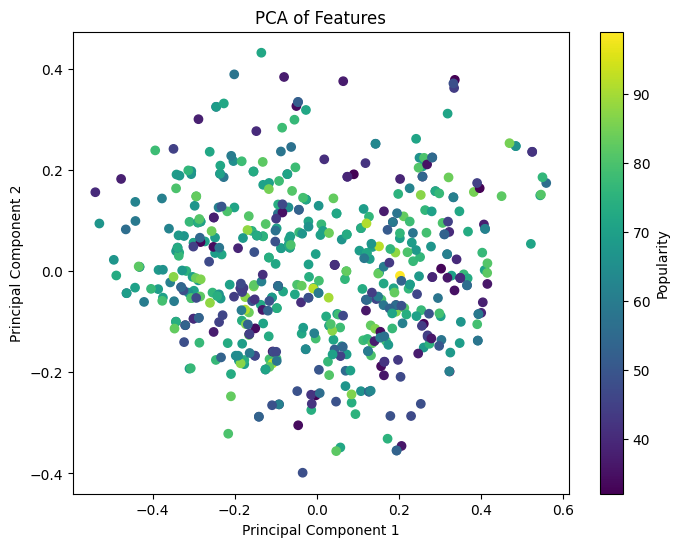

In [ ]:

# 10. Dimensionality Reduction Techniques
print("\n10. Dimensionality Reduction Techniques")
# Apply dimensionality reduction techniques such as PCA or t-SNE to visualize high-dimensional data in lower dimensions
# Example:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['danceability', 'energy', 'valence']])
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['popularity'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.colorbar(label='Popularity')
plt.show()


In [ ]:

# 11. Conclusion and Further Exploration
print("\n11. Conclusion and Further Exploration")
# Summarize key findings from the analysis
# Reflect on insights gained about Taylor Swift's music catalog
# Discuss potential further analysis or research directions using this dataset




11. Conclusion and Further Exploration


Genre Analysis

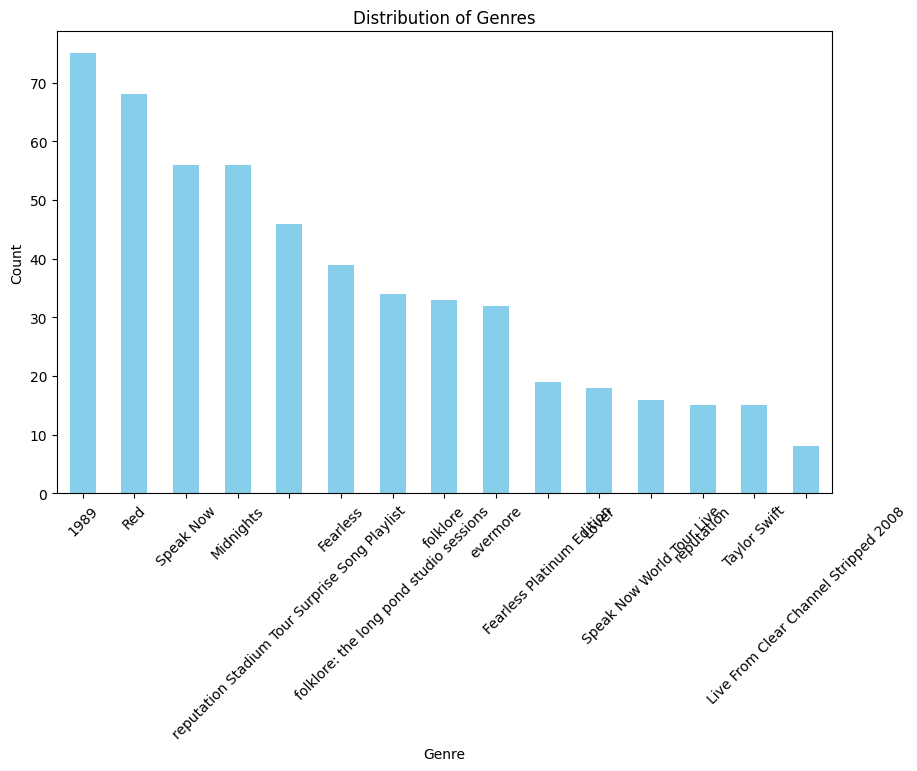

In [ ]:
# Extracting genres from album titles (for illustration purposes)
df['genre'] = df['album'].apply(lambda x: x.split('(')[0].strip())

# Plotting the distribution of genres
plt.figure(figsize=(10, 6))
df['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Feature Engineering

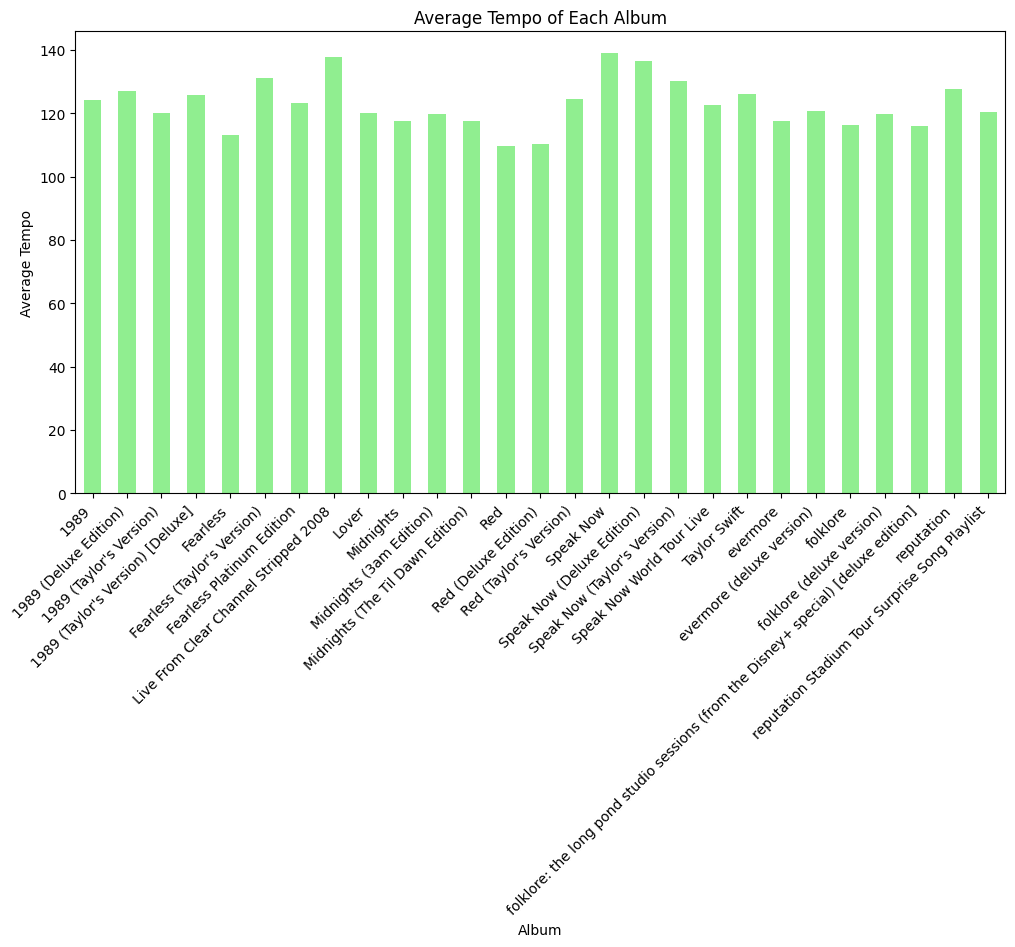

In [ ]:
# Calculate the average tempo of each album
average_tempo_by_album = df.groupby('album')['tempo'].mean()

# Visualize the average tempo of each album
plt.figure(figsize=(12, 6))
average_tempo_by_album.plot(kind='bar', color='lightgreen')
plt.title('Average Tempo of Each Album')
plt.xlabel('Album')
plt.ylabel('Average Tempo')
plt.xticks(rotation=45, ha='right')
plt.show()


Clustering Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


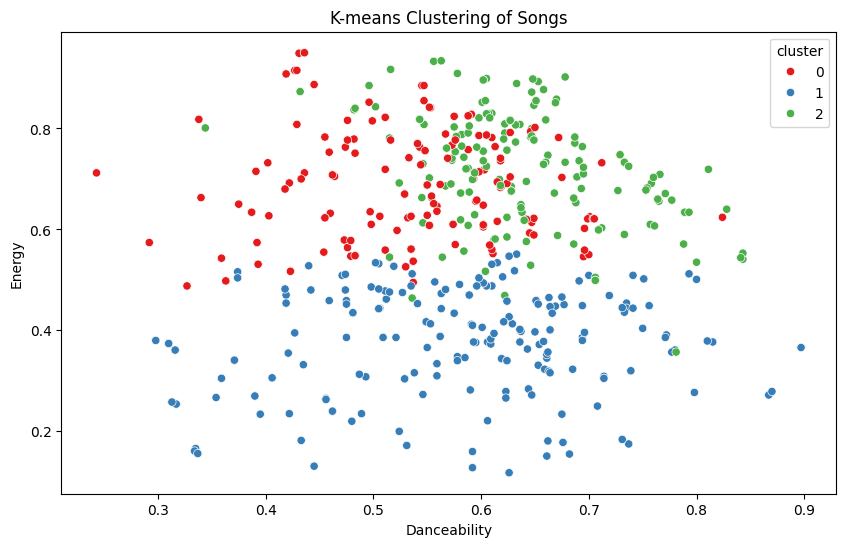

In [ ]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
features_for_clustering = df[['danceability', 'energy', 'valence']]

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster', palette='Set1')
plt.title('K-means Clustering of Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


Predictive Modelling

Explain what is predictive modelling
Why its used - advantages

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'valence']], df['popularity'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 225.2157827497917


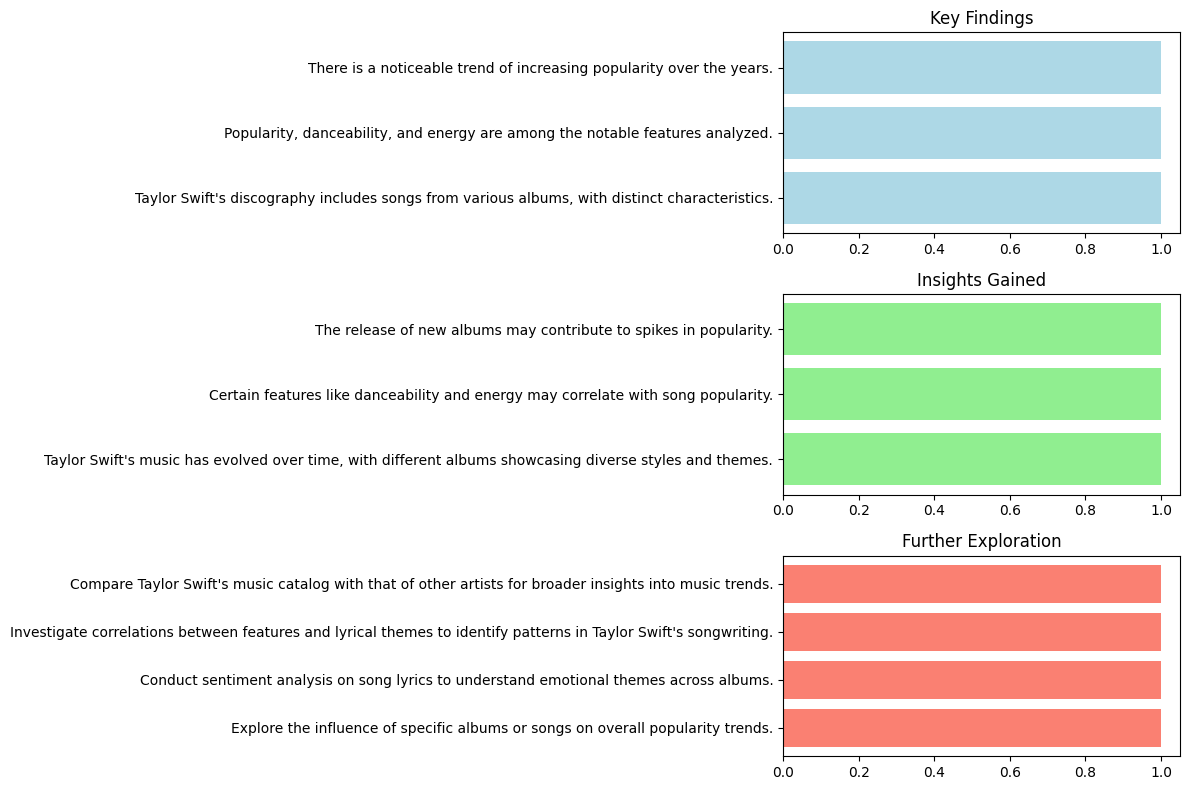

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Data for conclusion and further exploration
key_findings = ["Taylor Swift's discography includes songs from various albums, with distinct characteristics.",
                "Popularity, danceability, and energy are among the notable features analyzed.",
                "There is a noticeable trend of increasing popularity over the years."]

insights_gained = ["Taylor Swift's music has evolved over time, with different albums showcasing diverse styles and themes.",
                   "Certain features like danceability and energy may correlate with song popularity.",
                   "The release of new albums may contribute to spikes in popularity."]

further_exploration = ["Explore the influence of specific albums or songs on overall popularity trends.",
                       "Conduct sentiment analysis on song lyrics to understand emotional themes across albums.",
                       "Investigate correlations between features and lyrical themes to identify patterns in Taylor Swift's songwriting.",
                       "Compare Taylor Swift's music catalog with that of other artists for broader insights into music trends."]

# Plotting
plt.figure(figsize=(12, 8))

# Plotting key findings
plt.subplot(3, 1, 1)
plt.barh(range(len(key_findings)), [1] * len(key_findings), color='lightblue')
plt.yticks(range(len(key_findings)), key_findings, fontsize=10)
plt.title('Key Findings')

# Plotting insights gained
plt.subplot(3, 1, 2)
plt.barh(range(len(insights_gained)), [1] * len(insights_gained), color='lightgreen')
plt.yticks(range(len(insights_gained)), insights_gained, fontsize=10)
plt.title('Insights Gained')

# Plotting further exploration
plt.subplot(3, 1, 3)
plt.barh(range(len(further_exploration)), [1] * len(further_exploration), color='salmon')
plt.yticks(range(len(further_exploration)), further_exploration, fontsize=10)
plt.title('Further Exploration')

plt.tight_layout()
plt.show()
